# Problem Description: Preprocessing of a student data set to find the hours of studying and other activities which effect the overall performance of the student.

# Data Preprocessing Steps

1. Reading Data
2. Exploring Data / Data Insight
3. Cleansing Data
4. Outlier Detection and Removing
5. Data Transformation (Normalize Data / Rescale Data)
6. Categorical into Numerical 
7. Dimensionality Reduction(PCA)
8. Handling Imbalanced Data
9. Feature Selection
10. Data Splitting

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns 
color = sns.color_palette()

import numpy as np 
import pandas as pd 

# 1: Reading Data

In [13]:
data = pd.read_csv('Student_Performance.csv')

data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [14]:
data.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


In [15]:
data.head(30)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
5,3,78,No,9,6,61.0
6,7,73,Yes,5,6,63.0
7,8,45,Yes,4,6,42.0
8,5,77,No,8,2,61.0
9,4,89,No,4,0,69.0


In [16]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [17]:
data.shape

(10000, 6)

In [18]:
data.tail(20)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9980,2,43,No,6,9,20.0
9981,7,54,No,9,4,46.0
9982,8,51,No,5,1,44.0
9983,8,87,Yes,4,9,79.0
9984,6,45,Yes,6,2,34.0
9985,8,99,No,5,5,92.0
9986,1,48,Yes,8,5,25.0
9987,9,74,No,4,6,69.0
9988,1,47,No,8,5,20.0
9989,3,46,No,5,8,27.0


In [19]:
data.sample()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
8562,5,58,Yes,5,0,40.0


In [20]:
data.sample(30)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
6032,7,47,Yes,7,5,34.0
7646,4,63,Yes,7,6,48.0
493,4,91,No,9,5,80.0
8531,8,50,Yes,5,6,48.0
439,7,79,Yes,9,4,73.0
7089,8,57,Yes,6,0,49.0
8289,3,83,No,8,4,65.0
4652,4,84,Yes,4,5,71.0
5728,4,89,No,7,4,75.0
8435,2,52,No,6,0,28.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [22]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


# 2: Data Cleaning

Handling Missing Values
-
- Imputation: Filling missing values with mean.

In [23]:
import pandas as pd



In [24]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [25]:
import pandas as pd
import numpy as np


numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


numeric_cols.fillna(numeric_cols.mean(), inplace=True)   




data = pd.concat([numeric_cols, non_numeric_cols], axis=1)


missing_values = data.isnull().sum()
print(missing_values)


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities          0
dtype: int64


In [26]:
import pandas as pd
import numpy as np


numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


numeric_cols.fillna(numeric_cols.mean(), inplace=True)   

for col in non_numeric_cols.columns:
    non_numeric_cols[col].fillna(non_numeric_cols[col].mode()[0], inplace=True)  


data = pd.concat([numeric_cols, non_numeric_cols], axis=1)


missing_values = data.isnull().sum()
print(missing_values)


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities          0
dtype: int64


In [27]:
data.shape

(10000, 6)

Removal: Deleting rows with missing values.
-

In [28]:

data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities          0
dtype: int64

In [29]:
data.shape

(10000, 6)

In [30]:

data.dropna(inplace=True)


missing_values = data.isnull().sum()
print(missing_values)


Hours Studied                       0
Previous Scores                     0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
Extracurricular Activities          0
dtype: int64


In [31]:
data.shape

(10000, 6)

Removing Duplicates
-

In [32]:

data.shape


(10000, 6)

In [33]:
data.drop_duplicates(inplace=True)
data.shape

(9873, 6)

# 3: Outlier Detection and Removal

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [35]:
0.25-1.5*0.5

-0.5

In [36]:
0.75 + 1.5 * 0.5

1.5

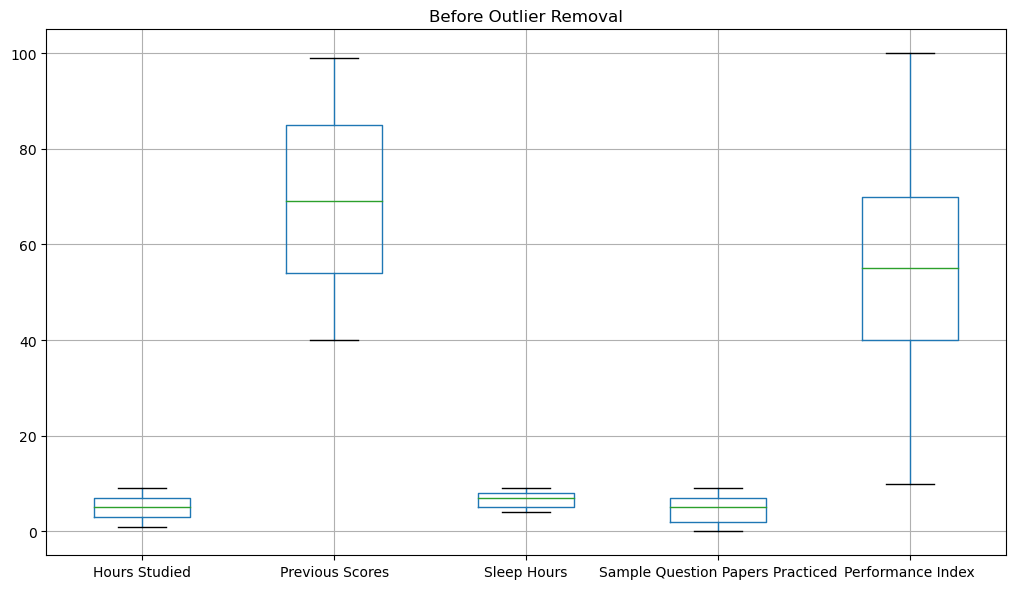

In [37]:

numeric_cols = data.select_dtypes(include=[np.number])


Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers        # 0.25-1.5*0.5 = -0.5                      #  0.75 + 1.5 * 0.5 = 1.5

data_cleaned = data[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]


plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 1)
numeric_cols.boxplot()
plt.title("Before Outlier Removal")



plt.tight_layout()
plt.show()


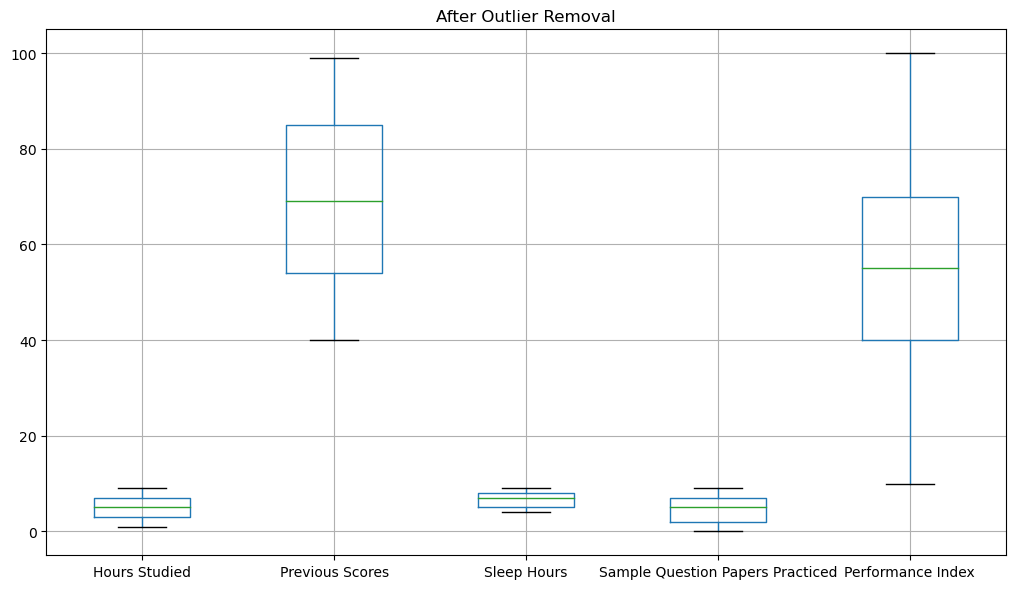

In [38]:
plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 2)
data_cleaned.select_dtypes(include=[np.number]).boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()


In [39]:
data_cleaned.shape

(9873, 6)

In [40]:
data_cleaned.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,Yes
1,4,82,4,2,65.0,No
2,8,51,7,2,45.0,Yes
3,5,52,5,2,36.0,Yes
4,7,75,8,5,66.0,No


# 4. Data Transformation


Key Differences
-
Range of Values:

Normalization: Values are scaled to a fixed range, typically [0, 1].
Standardization: Values are rescaled to have a mean of 0 and a standard deviation of 1.
Effect on Distribution:

Normalization: Compresses or stretches the data to fit within the specified range, potentially altering the original distribution.
Standardization: Preserves the shape of the original distribution but changes the scale.
Use Cases:

Normalization: Suitable for distance-based algorithms, like k-nearest neighbors and neural networks.
Standardization: Suitable for algorithms that assume a normal distribution, like linear regression and logistic regression.


Normalization/Standardization
-
- Normalization
Definition:
Normalization rescales the data to a fixed range, typically [0, 1] or [-1, 1].

In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler





numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = MinMaxScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)

scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(9873, 6)

************************************************************


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,0.750,1.000000,1.0,0.111111,0.900000,Yes
1,0.375,0.711864,0.0,0.222222,0.611111,No
2,0.875,0.186441,0.6,0.222222,0.388889,Yes
3,0.500,0.203390,0.2,0.222222,0.288889,Yes
4,0.750,0.593220,0.8,0.555556,0.622222,No


Standardization
-
Definition:
Standardization rescales the data so that it has a mean of 0 and a standard deviation of 1.

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler





numeric_cols = data.select_dtypes(include=[np.number])
non_numeric_cols = data.select_dtypes(exclude=[np.number])


scaler = StandardScaler()
scaled_numeric_data = scaler.fit_transform(numeric_cols)


scaled_numeric_df = pd.DataFrame(scaled_numeric_data, columns=numeric_cols.columns)


scaled_data = pd.concat([scaled_numeric_df, non_numeric_cols.reset_index(drop=True)], axis=1)

print(scaled_data.shape)
print()
print('*' * 60)
scaled_data.head()


(9873, 6)

************************************************************


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,0.775566,1.706168,1.454025,-1.249715,1.862979,Yes
1,-0.383205,0.724912,-1.491315,-0.900925,0.509348,No
2,1.161822,-1.064438,0.275889,-0.900925,-0.531907,Yes
3,0.003052,-1.006717,-0.902247,-0.900925,-1.000471,Yes
4,0.775566,0.320865,0.864957,0.145444,0.561411,No


# 5: One-Hot Encoding


In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler



data.head(2)

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities
0,7,99,9,1,91.0,Yes
1,4,82,4,2,65.0,No


In [44]:
data["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler





cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']


data1 = pd.get_dummies(cat_features)
data1

,Extracurricular Activities
0,1


In [46]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Extracurricular Activities  1 non-null      uint8
dtypes: uint8(1)
memory usage: 133.0 bytes


In [47]:
cat_features

['Extracurricular Activities']

In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler





cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']


data1 = pd.get_dummies(data, columns=cat_features)

scaled_data = pd.concat([data, data1], axis=1)


print(scaled_data.shape)
print()
print('*' * 70)

scaled_data.head()


(9873, 13)

**********************************************************************


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,Yes,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,No,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,Yes,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,Yes,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,No,7,75,8,5,66.0,1,0


In [49]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities'],
      dtype='object')

In [50]:
scaled_data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities', 'Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes'],
      dtype='object')

In [51]:
data1.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


# 6: Data Reduction

Dimensionality Reduction
-
PCA (Principal Component Analysis)

In [52]:
scaled_data.shape

(9873, 13)

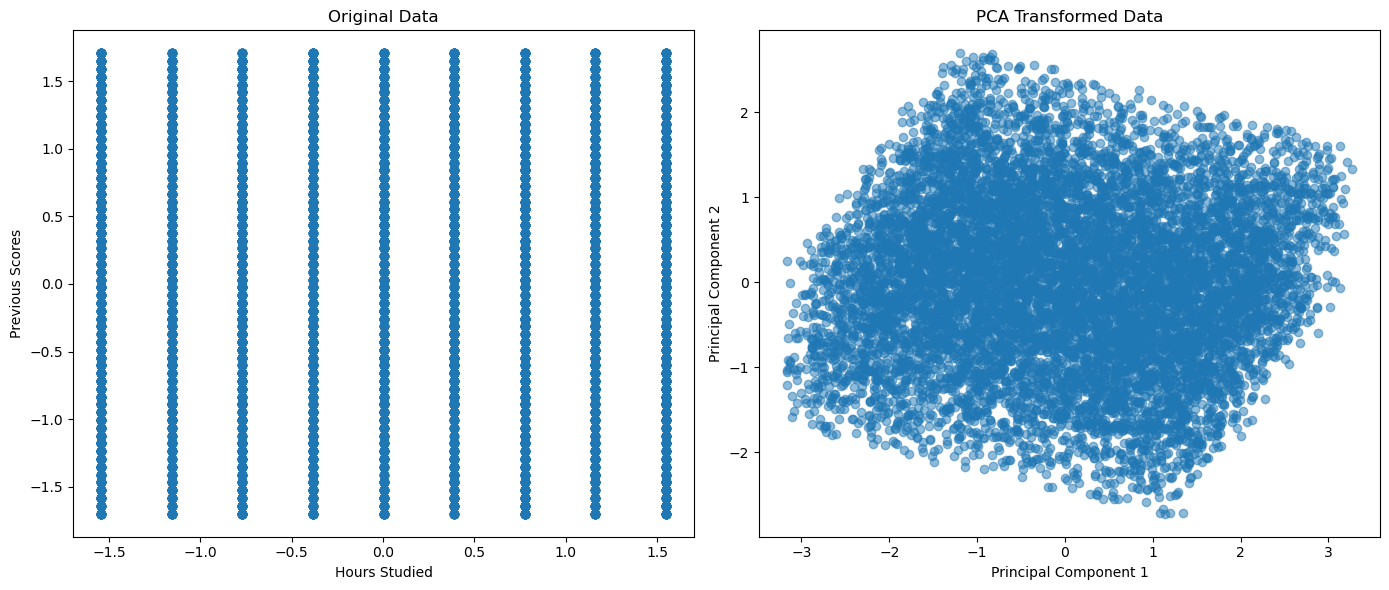

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA





cat_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']


numeric_means = data[numeric_features].mean()
data[numeric_features] = data[numeric_features].fillna(numeric_means)


data = pd.get_dummies(data, columns=cat_features)


scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


pca_2 = PCA(n_components=2)
data_pca_2 = pca_2.fit_transform(data)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.scatter(data[numeric_features[0]], data[numeric_features[1]], alpha=0.5)
plt.title('Original Data')
plt.xlabel(numeric_features[0])
plt.ylabel(numeric_features[1])


plt.subplot(1, 2, 2)
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


In [54]:
type(data_pca_2)

numpy.ndarray

In [55]:
data_pca_2.ndim

2

In [56]:
data_pca_2.shape

(9873, 2)

# 7: Handling Imbalanced Data
    
- Resampling Techniques
- Oversampling

In [81]:
import pandas as pd
import numpy as np
import imblearn
import category_encoders
import packaging.version
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt


data = pd.read_csv('Student_Performance.csv')


data.fillna(data.mean(numeric_only=True), inplace=True)


target = data['Hours Studied']
data = data.drop(columns=['Hours Studied'])

cat_features = [col for col in data.columns if data[col].dtype == 'O']
numeric_features = [col for col in data.columns if data[col].dtype != 'O']

data = pd.get_dummies(data, columns=cat_features)


scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


if target.dtype == 'O':
    le = LabelEncoder()
    target = le.fit_transform(target)
elif target.dtype == 'float':
    target = (target > 0.5).astype(int)


print("Before SMOTE:", data.shape, target.shape)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data, target)


resampled_df = pd.concat([
    pd.DataFrame(X_resampled, columns=data.columns),
    pd.DataFrame(y_resampled, columns=['Hours Studied'])
], axis=1)

print("After SMOTE:", resampled_df.shape)
resampled_df.head()


Before SMOTE: (10000, 6) (10000,)
After SMOTE: (10368, 7)


,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes,Hours Studied
0,1.704176,1.456205,-1.249754,1.862167,0,1,7
1,0.723913,-1.492294,-0.900982,0.508818,1,0,4
2,-1.063626,0.276805,-0.900982,-0.532220,0,1,8
3,-1.005963,-0.902594,-0.900982,-1.000687,0,1,5
4,0.320275,0.866505,0.145333,0.560870,1,0,7


In [82]:
resampled_df['Hours Studied'].value_counts(True)


7    0.111111
4    0.111111
8    0.111111
5    0.111111
3    0.111111
6    0.111111
2    0.111111
1    0.111111
9    0.111111
Name: Hours Studied, dtype: float64

In [83]:
resampled_df.shape

(10368, 7)

In [84]:
print(resampled_df.columns)
print(list(resampled_df.columns))

Index(['Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced',
       'Performance Index', 'Extracurricular Activities_No',
       'Extracurricular Activities_Yes', 'Hours Studied'],
      dtype='object')
['Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes', 'Hours Studied']


In [85]:
print(data.columns)
print(list(data.columns))


Index(['Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced',
       'Performance Index', 'Extracurricular Activities_No',
       'Extracurricular Activities_Yes'],
      dtype='object')
['Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']


Undersampling
-

In [86]:
import pandas as pd
import numpy as np
import imblearn
import category_encoders
import packaging.version
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


data = pd.read_csv('Student_Performance.csv')


data.fillna(data.mean(numeric_only=True), inplace=True)


target = data['Hours Studied']
data = data.drop(columns=['Hours Studied'])

cat_features = [col for col in data.columns if data[col].dtype == 'O']
numeric_features = [col for col in data.columns if data[col].dtype != 'O']

data = pd.get_dummies(data, columns=cat_features)


scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])


if target.dtype == 'O':
    le = LabelEncoder()
    target = le.fit_transform(target)
elif target.dtype == 'float':
    target = (target > 0.5).astype(int)


print("Before undersampling:", data.shape, target.shape)


rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(data, target)


resampled_df = pd.concat([
    pd.DataFrame(X_resampled, columns=data.columns),
    pd.DataFrame(y_resampled, columns=['Hours Studied'])
], axis=1)

print("After undersampling:", resampled_df.shape)
resampled_df.head()


Before undersampling: (10000, 6) (10000,)
After undersampling: (9765, 7)


,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_No,Extracurricular Activities_Yes,Hours Studied
1353,-0.083363,-0.312895,1.191649,-0.688376,1,0,1
6622,0.781575,0.276805,-0.900982,-0.063753,0,1,1
5076,1.588851,1.456205,1.191649,0.769077,1,0,1
1998,0.896900,-1.492294,0.494105,0.248558,1,0,1
6245,1.531188,0.866505,-0.552210,0.769077,1,0,1


In [88]:
resampled_df['Hours Studied'].value_counts()

1    1085
2    1085
3    1085
4    1085
5    1085
6    1085
7    1085
8    1085
9    1085
Name: Hours Studied, dtype: int64

In [89]:
resampled_df.shape

(9765, 7)

# Target Encoder

In [90]:
import pandas as pd
from category_encoders import TargetEncoder

# Example dataset
data = {'animal': ['cat', 'dog', 'mouse', 'dog', 'cat'], 'target': [1, 0, 1, 0, 1]}
df = pd.DataFrame(data)

target_encoder = TargetEncoder(cols=['animal'])
target_encoded = target_encoder.fit_transform(df['animal'], df['target'])
print(target_encoded)


     animal
0  0.656740
1  0.514889
2  0.652043
3  0.514889
4  0.656740


# 8: Splitting Data

In [93]:
from sklearn.model_selection import train_test_split


X = resampled_df.drop('Hours Studied', axis=1)
y = resampled_df['Hours Studied']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [94]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6835, 6), (2930, 6), (6835,), (2930,))

# 9.Regression



In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'data' is your fully preprocessed DataFrame
X = resampled_df.drop('Performance Index', axis=1)
y = resampled_df['Performance Index']

# Train/test split


# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📊 Linear Regression Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Show coefficients
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr_model.coef_})
print("\n🔍 Feature Coefficients:")
print(coeff_df)


📊 Linear Regression Evaluation:
Mean Squared Error: 0.48
R² Score: 0.93

🔍 Feature Coefficients:
                            Feature  Coefficient
0                   Previous Scores    -5.749869
1                       Sleep Hours    -0.267676
2  Sample Question Papers Practiced    -0.169628
3     Extracurricular Activities_No     6.259859
4    Extracurricular Activities_Yes     0.098548
5                     Hours Studied    -0.098548


# Prediction

In [102]:
# Correct feature and target separation
X = resampled_df.drop('Performance Index', axis=1)  # features
y = resampled_df['Performance Index']               # target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# This must match the feature columns used in X
new_data = pd.DataFrame({
    'Previous Scores': [75],
    'Sleep Hours': [6],
    'Sample Question Papers Practiced': [5],
    'Extracurricular Activities_No': [0],
    'Extracurricular Activities_Yes': [1],
    'Hours Studied': [3],
})

# Ensure same column order
new_data = new_data[X.columns]

# Predict
prediction = lr_model.predict(new_data)
print(f"🎯 Predicted Performance Index: {prediction[0]:.2f}")


🎯 Predicted Performance Index: 69.03
